## Titanic

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Setup 

Antes de iniciar as análises vamos importar as libs e os datasets(Train and Test).

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Matplotlib configuration
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
test = pd.read_csv("data/test.csv")

### Analisando o dataset  train

Nosso dataset de treino é o dataset que vamos utilizar para treinar o nosso modelo de Machine Learning.

Vamos veriicar quais variáveis possuímos disponível.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nosso DataSet possui 12 colunas:
* PassagerId: Id de cada passageiro.
* Survived: Sobreviventes do naufrágio.
* Pclass: Número da classe (1,2,3)
* Name: nome do passageiro.
* Sex: Sexo do passageiro (male or female)
* Age: Idade dos passageiros.
* SibSb: Número de irmãos/companheiros a bordo do Titanic
* Parch: Número de pais/filhos a bordo do Titanic
* Ticket: Número do ticket
* Cabin: Número da Cabine
* Embarked: Local de Embarque

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos verificar se há valores nulos em nosso dataset de treino.

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Em nosso dataset de treino possuímos três colunas com valores nulos: Age, Cabin e Embarked. Precisaremos tratar esses valores nulos para não prejudicar a performance de nosso modelo.

### Analisando o Dataset de Teste 

Vamos verificar o nosso dataset de teste, que é onde aplicaremos nosso modelo de Machine Learning. O dataset de teste possui as mesmas variáveis que nosso dataset de treino, com exceção da variável **Survived** que é o que desejamos prever.


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Em nossa base de test também possuímos um total de 11 colunas com 418 linhas. Entre essas 11 variáveis 5 são variáveis categóricas e 6 variáveis numéricas int ou float.

Vamos verificar nosso dataset de test.

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Vamos verificar se há valores nulos em nossa base de teste.

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

A nossa base de teste possuí valores vazios nas variáveis Age, Cabin e Fare.

### Explorando a base de treino

Nossa base de treino é a base que utilizaremos para treinar o modelo de Machine Learning que iremos utilizar. Antes de iniciar o tratamento dos dados, vamos refletir sobre as possíveis relações que podemos ter.

Desejamos prever os sobreviventes do naufrágio do Titanic. Pensando no filme algumas provocações:

* Mulheres e crianças embarcavam primeiro nos botes salva vidas. Quantos dos sobreviventes são do sexo masculino e feminino?
* Qual a faixa etária dos sobreviventes?
* A faixa etária dos sobreviventes varia de acordo com o sexo?
* Sabemos que o embarque dos botes salva vidas foi feito por classe: sobreviveram mais passageiros da Classe 1?

**Distribuição de idades dos passageiros do Titanic**

Vamos analisar inicialmente qual a distribuição de idades dos nossos passageiros. Refletindo sobre a dinâmica do embarque nos botes salva vidas crianças do sexo masculino, provavelmente, possuem maior change de sobrevivência que adultos. 

A maioria dos passageiros do RMS Titanic estão na faixa etária entre 20 e 40 anos, com um número interessante de bebês, provavelmente casais com seus filhos.

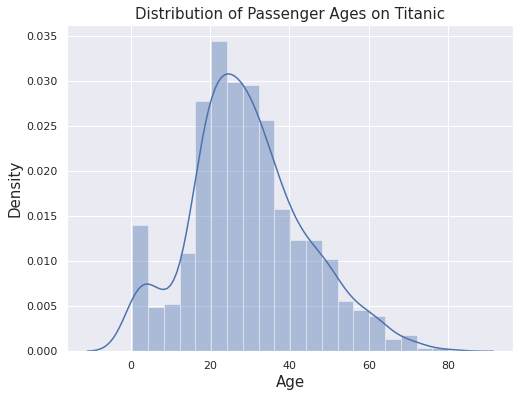

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(train["Age"], kde=True, ax = ax)
plt.title('Distribution of Passenger Ages on Titanic', fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.xlabel("Age", fontsize= 15)
plt.show();

**Sobreviventes em relação ao sexo**

Observando os gráficos abaixos temos a relação por sexo da quantidade de sobreviventes e claramente percebemos que a maioria das mulheres sobreviveu ao desastre, enquanto a maioria dos homens presentes no Titanic não sobreviveu.

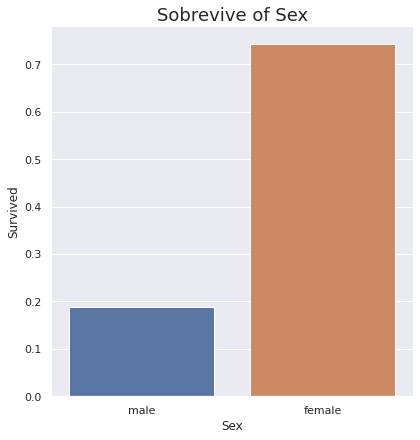

In [12]:
g = sns.catplot(x="Sex", y="Survived", data=train,
                height=6, kind="bar", ci=None)
g.ax.set_title("Sobrevive of Sex",fontdict= {'size':18})
plt.show()

**Sobreviventes em relação ao sexo e faixa etária**

Homens possuem uma probabilidade menor de sobrevivência, mas crianças do sexo masculino possuem uma chance de sobrevivência já que serão os primeiros a embarcarem nos botes salva- vidas. 

Observando os gráficos abaixo percebemos que a maioria dos sobreviventes do sexo feminino se encontram na faixa etária de 20 e 35 anos. Enquanto a maioria dos sobreviventes do sexo masculina se encontram na faixa etária de 0 e 5 anos, apesar de haver um número alto de sobreviventes na faixa de 30 anos.

Text(0.5, 1.0, 'Male')

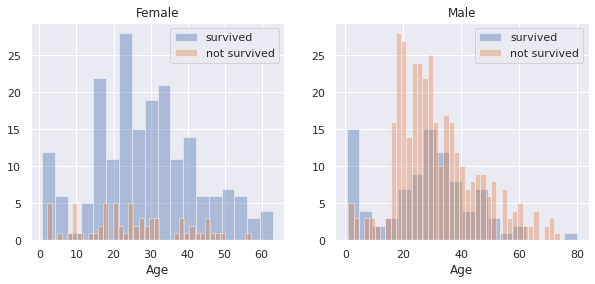

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

female = train[train['Sex']=='female']
male = train[train['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

No segundo gráfico podemos verificar entre os sobreviventos do naufrágio a relação de homens e mulheres. Cerca 70% das mulheres que estavam no navio sobreviveram, enquanto apenas 20% dos passageiros do sexo masculino sobreviveram.

**Sobreviventes de acordo com a classe**

No Titanic temos 3 classes: 

* Classe 1: Classe alta (composta pela aritocrácia).
* Classe 2: Classe média (burguesia trabalhadora).
* Classe 3: Composta pelo proletariado.

Vamos verificar a distribuição dos sobreviventes de acordo com a classe. 

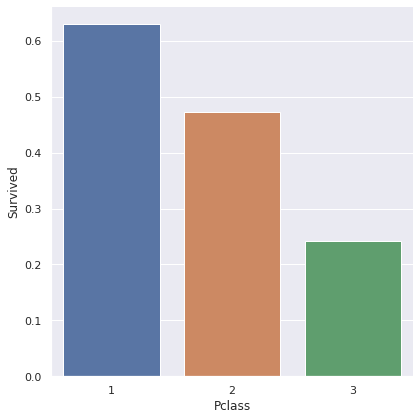

In [14]:
g = sns.catplot(x="Pclass", y="Survived", data=train,
                height=6, kind="bar", ci=None)
plt.show()

A Classe 1 possui a maioria dos sobreviventes de nosso dataset, enquanto a Classe 3 possui o maior número de passageiros mortos no desastre, isso pode ser verificado em maiores detalhes no gráfico abaixo.

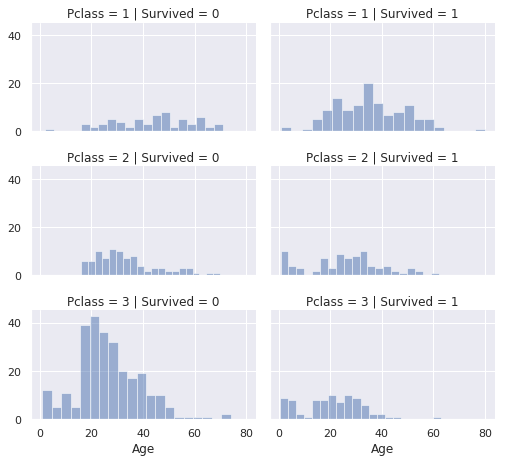

In [15]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Sobreviventes em relação a classe e sexo**

Pensando nas classes existentes no Titanic quantos dos sobreviventes da Classe 1 eram do sexo feminino ou masculino? E das Classes 2 e 3?

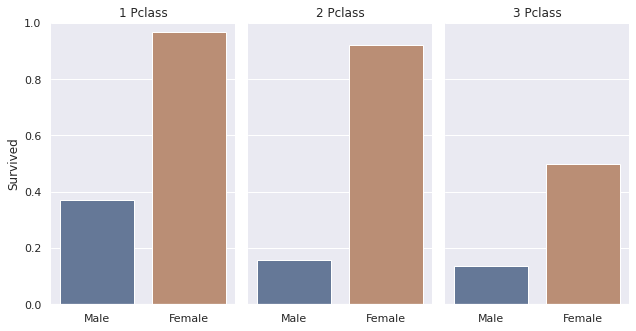

In [16]:
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                data=train, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survived")
  .set_xticklabels(["Male", "Female"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

Nas três classes a maioria dos sobreviventes pertence ao sexo feminino. Mesmo com a discrepância de sobrevivência em relação ao sexo e o eixo y limitado a 1 percebe-se que os sobreviventes do sexo masculino são muito maiores na classe 1, do que nas classes 2 e 3.

### Analisando o nosso dataset

Após a exploração dos dados percebemos que há colunas que se relacionam (Sex, Age, Pclass). Agora vamos analisar e tratar o restante de nossos dados antes de aplicarmos o modelo de Machine Learning.

* Transformar as variáveis categóricas em variáveis numéricas
* Substituir nossos espaços em branco.
* Verificar se há variáveis que não vamos utilizar na análise.

**Explorando as variáveis numéricas**

Verificando nosso dataset temos valores nulos de idade (Age), vamos substituir nossos valores faltantes pela mediana. A mediana é a tendência central dos valores e para substituir valores nulos em um dataset é mais robusta que a média. 

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
median= train['Age'].median()
train['Age'].fillna(value=median, inplace=True)

In [19]:
median= test['Age'].median()
test['Age'].fillna(value=median, inplace=True)

**Verificando a correlação das variáveis numéricas**


Vamos verificar quais variáveis se encontram mais correlacionadas para treinar nosso modelo. 

In [20]:
correlation = train.corr()

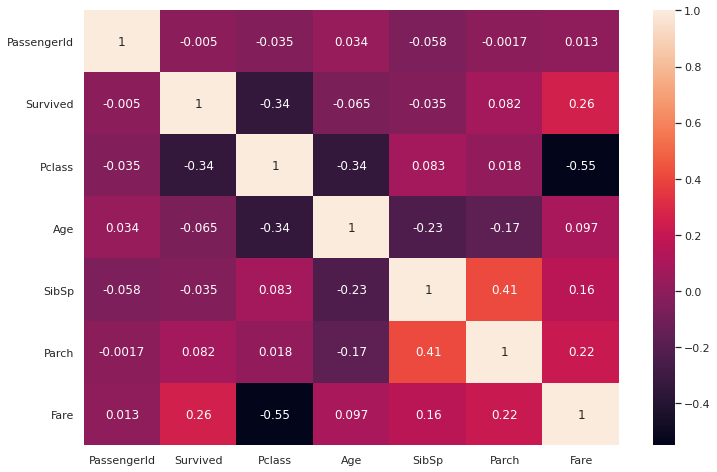

In [21]:
xaxis = plt.subplots(figsize = (12,8))
sns.heatmap(correlation, annot=True, annot_kws = {"size":12});

Em nossa matriz de correlação percebemos que não há nenhuma variável extremamente correlacionada, logo teremos que nos guiar pelas observações.

**Removendo colunas**

Vamos analisar e remover colunas que podem dizer as mesmas informações ou que podem não influenciar no nosso modelo.

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Variáveis Numéricas**

Observando as variáveis numéricas o valor da passagem(Fare) apesar de ser extremamente relevante, dado que podemos identificar a classe que pertence o passageiro. Entretanto já possuímos as classes em outra coluna é uma informação redundante.

In [23]:
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

**Variáveis Categóricas**

As colunas Name, Ticket e Cabin não representam impacto significativo no nosso modelo.

In [24]:
train = train.drop(['Name','Ticket','Cabin'], axis=1)
test = test.drop(['Name','Ticket','Cabin'], axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


**Transformando as variáveis categóricas em numéricas**

Antes de prosseguir para a aplicação do modelo devemos transformar as variáveis categóricas em variáveis numéricas. Vamos fazer isso utilizando o Get Dummies.

O [Get Dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) é um módulo do Pandas que nos permite transformar nossas variáveis categóricas em variáveis numéricas.

In [26]:
var_objects =  train.select_dtypes('object').columns
var_objects

Index(['Sex', 'Embarked'], dtype='object')

Vamos modificar o nome do nosso dataframe para train_dummies, para termos nosso dataset original e o dataset após a utilização do get_dummies. 

In [27]:
train_dummies = pd.get_dummies(train, columns=var_objects)

In [28]:
train_dummies.head().style.hide_index()

PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,0,3,22.000000,1,0,0,1,0,0,1
2,1,1,38.000000,1,0,1,0,1,0,0
3,1,3,26.000000,0,0,1,0,0,0,1
4,1,1,35.000000,1,0,1,0,0,0,1
5,0,3,35.000000,0,0,0,1,0,0,1


In [29]:
var_object =  test.select_dtypes('object').columns
var_object

Index(['Sex', 'Embarked'], dtype='object')

In [30]:
test_dummies = pd.get_dummies(test, columns=var_object)

In [31]:
test_dummies.head().style.hide_index()

PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
892,3,34.500000,0,0,0,1,0,1,0
893,3,47.000000,1,0,1,0,0,0,1
894,2,62.000000,0,0,0,1,0,1,0
895,3,27.000000,0,0,0,1,0,0,1
896,3,22.000000,1,1,1,0,0,0,1


### Aplicando a Random Forest

Vamos utilizar o modelo de Machine Learning Random Forest. O algoritimo Random Forest cria várias árvores de decisão e as mescla para obter uma previsão mais precisa e estável.

O  Random Forest é que ele pode ser usada para problemas de classificação e regressão, que formam a maioria dos sistemas atuais de aprendizado de máquina. 

O algoritmo Random Forest traz aleatoriedade extra para o modelo, quando as árvores estão crescendo. Em vez de procurar o melhor recurso ao dividir um nó, ele procura o melhor recurso entre um subconjunto aleatório de recursos. Esse processo cria uma ampla diversidade, o que geralmente resulta em um modelo melhor. Portanto, quando você está desenvolvendo uma árvore com Random Forest, apenas um subconjunto aleatório dos recursos é considerado para dividir um nó. 

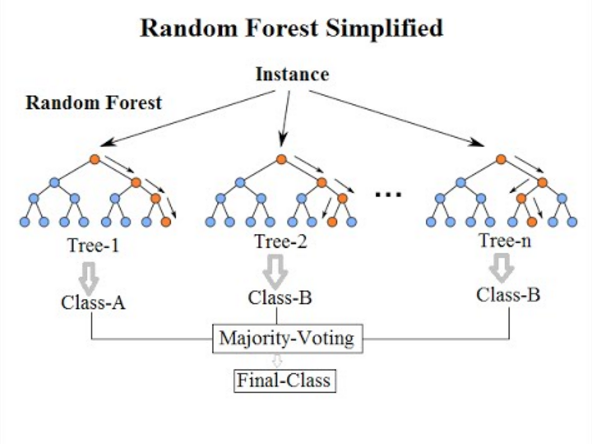

Vamos verificar como estão nossos datasets.

O dataset train_dummies é o que vamos utilizar para treinar nosso modelo, então vamos separá-lo em X_train e Y_train.
* X_train: contém as variáveis de nosso dataset, com excessão da que desejamos prever
* Y_train: variável que desejamos prever no dataset de test.
* X_test: cópia do dataset de test. Deve conter o mesmo número de colunas do X_train.


In [32]:
train_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


In [33]:
test_dummies.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,0,1,0,1,0
1,893,3,47.0,1,0,1,0,0,0,1
2,894,2,62.0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,0,1,0,0,1
4,896,3,22.0,1,1,1,0,0,0,1


In [34]:
X_train = train_dummies.drop('Survived', axis=1)
Y_train = train_dummies['Survived']
X_test  = test_dummies.copy()

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")

In [38]:
print("Score:", scores)
print("Média:", scores.mean())
print("Desvio Padrão:", scores.std())

Score: [0.78888889 0.78651685 0.78651685 0.71910112 0.78651685 0.79775281
 0.84269663 0.82022472 0.82022472 0.83146067]
Média: 0.7979900124843945
Desvio Padrão: 0.0328770052417117


Isso parece muito mais realista do que antes. Nosso modelo tem uma precisão média de 80% com um desvio padrão de 1,8%. O desvio padrão nos mostra quão precisas são as estimativas.

Vamos verificar nossas features por ordem de importância.

In [39]:
features = X_train.columns
features

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [40]:
importances = np.round(random_forest.feature_importances_,3)
importances

array([0.279, 0.106, 0.21 , 0.052, 0.037, 0.132, 0.149, 0.013, 0.008,
       0.014])

In [41]:
sorted_id = importances.argsort()

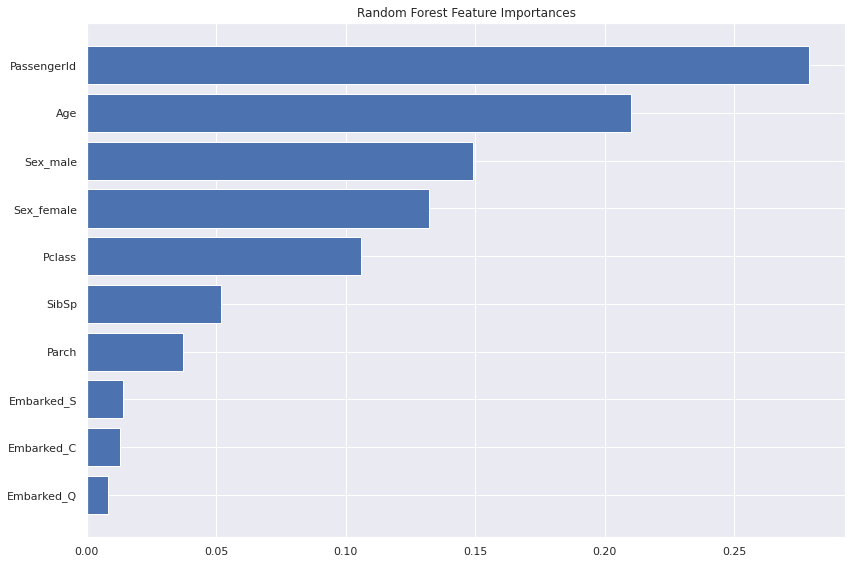

In [42]:
y_ticks = np.arange(0, len(features))
fig, ax = plt.subplots()
ax.barh(y_ticks, importances[sorted_id])
ax.set_yticklabels(features[sorted_id])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

Conforme observamos em nossas análises a idade, sexo e classe são features muito relevantes para a predição do modelo. E as features Embarked e Parch são as menos relevantes, logo vamos retirá-las de nossa análise.

In [43]:
train_dummies  = train_dummies.drop(['Embarked_S','Embarked_C','Embarked_Q','Parch'], axis=1)
test_dummies  = test_dummies.drop(['Embarked_S','Embarked_C','Embarked_Q','Parch'], axis=1)

In [44]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

100.0 %


### Matriz de Confusão

In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[483,  66],
       [120, 222]])

A primeira linha é sobre as predições dos não sobreviventes: 493 passageiros foram classificados corretamente como não sobreviventes e 76 foram erroneamente classificados como não sobreviventes.

A segunda linha é sobre as previsões dos sobreviventes: 114 passageiros classificados erroneamente como sobreviventes e 228 onde corretamente classificados como sobreviventes.

In [46]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7708333333333334
Recall: 0.6491228070175439


In [47]:
Y_prediction = random_forest.predict(X_test)

O Random Forest transforma a variável de predição em um array, vamos utilizar o pandas para transformar esse array em uma série, para termos a resposta no formato desejado.

In [48]:
Y_prediction =  pd.Series(Y_prediction)
Y_prediction

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Length: 418, dtype: int64

In [49]:
X_test_Id= X_test['PassengerId']

In [50]:
titanic_survived = pd.concat([X_test_Id, Y_prediction], axis=1)
titanic_survived

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Nossa resposta deve conter 2 colunas **PassengerId e Survived** vamos renomeá-las.

In [51]:
titanic_survived.rename(columns={0:'Survived'}, inplace=True)
titanic_survived

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
titanic_survived.to_csv('titanic_survived.csv',columns=['PassengerId', 'Survived'], sep=',', index=False)